In [ ]:
import pickle
import os
from matplotlib import pyplot as plt

In [29]:
import numpy as np

model_dir = "lightning_logs/colorj_train-prob=0.5"
for eval_test_prob in [0.0, 0.5, 1.0]:
    with open(f"{model_dir}/eval-on-testp={eval_test_prob}.pkl", "rb") as f:
        cbe = pickle.load(f)
    e1, e2 = cbe['clip_cbe'][0], cbe['clip_cbev2'][0]
    print(e1/np.abs(e1).max())
    print(e2/np.abs(e2).max())

    e3, e4 = cbe['tcav'], cbe['bayesian'][0]
    print(e3/np.abs(e3).max())
    print(e4/np.abs(e4).max())
    print("--------------")

[[ 0.34419626 -0.8465009   0.41570258 -0.08793487]
 [-0.40690148  1.         -0.48976633  0.1027722 ]]
[[-0.12136988  0.29163277  0.8928866  -0.32269695]
 [ 0.12668502 -0.3194367  -1.          0.41131902]]
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]]
[[ 0.30729935 -0.7860016   0.7296484  -0.00110308]
 [-0.8357352   1.         -0.40159684 -0.08410011]]
--------------
[[ 0.65541977 -0.07236143  0.01761562 -0.8478835 ]
 [-0.7743442   0.08603982 -0.01978041  1.        ]]
[[ 0.8467202  -0.32600668 -0.19593984 -0.5718635 ]
 [-1.          0.38396987  0.23409669  0.67317706]]
[[1.         0.57575758 0.42424242 0.        ]
 [0.         0.76470588 0.23529412 1.        ]]
[[ 0.8437286  -0.00164758  0.0135638  -0.7378877 ]
 [-1.          0.00172831 -0.01538     0.8676562 ]]
--------------
[[ 0.01012311  0.84573644 -0.799579   -0.1858711 ]
 [-0.01112653 -1.          0.9451203   0.21872048]]
[[ 0.40532798  0.54007137 -0.84536415 -0.4048966 ]
 [-0.49695945 -0.61927766  1.          0.4831972 ]]
[[1. 1. 0. 0.]
 [0. 

## Expt A

In [4]:
import numpy as np
import matplotlib
font = {'size'   : 14, 'family': ''}

matplotlib.rc('font', **font)

_norm = lambda _: np.abs(_/np.abs(_).max())
model_dir = "lightning_logs/fcolor"
arr1, arr2 = [], []
for ei, eval_test_prob in enumerate([0.0, 0.5, 1.0]):
    with open(f"{model_dir}/eval-on-testm={eval_test_prob}.pkl", "rb") as f:
        cbe = pickle.load(f)
    baseline = cbe['simple']
    tcav = cbe['tcav']
    ocbm = cbe['ocbm']
    
    mu, sigma = cbe['clip_cbe']
    baseline, tcav, ocbm, mu = _norm(baseline), _norm(tcav), _norm(ocbm), _norm(mu)

    _x = [_.detach().numpy() for _ in cbe['gt']]
    x = [1, 2, 3, 4]
    plt.plot(x, _norm(_x), 'r*', label='GT')
    plt.plot(x, baseline[0], 'yD', label='baseline')
    plt.plot(x, tcav[0], 'g^', label='TCAV')
    plt.plot(x, ocbm[0], 'b.', label='O-CBM')
    plt.errorbar(x, mu[0], yerr=sigma/sigma.max(), fmt='ko', label='U-ACE')
    plt.ylim(-2, 2)
    if eval_test_prob == 0.0:
        plt.legend()
    plt.tight_layout()
    plt.savefig(f"plots/exptA_{ei+1}.pdf")
    plt.show()
print(cbe['gt'])

NameError: name 'plt' is not defined

### second attempt for better plots

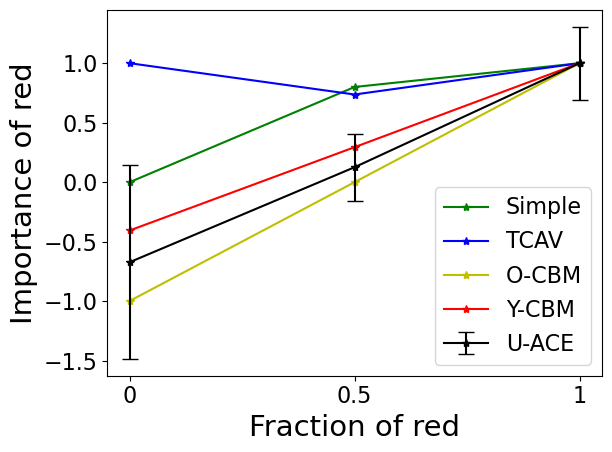

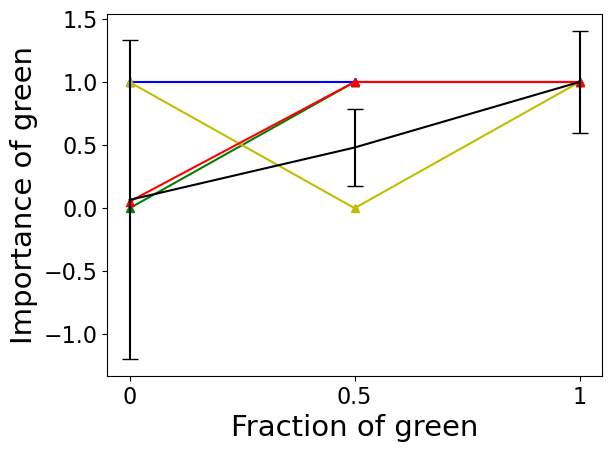

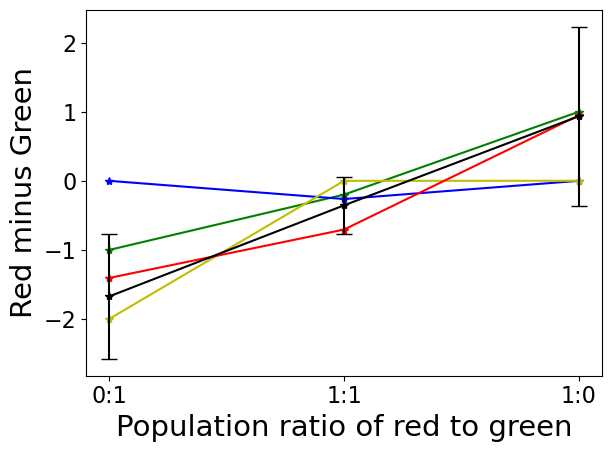

(3, 4)


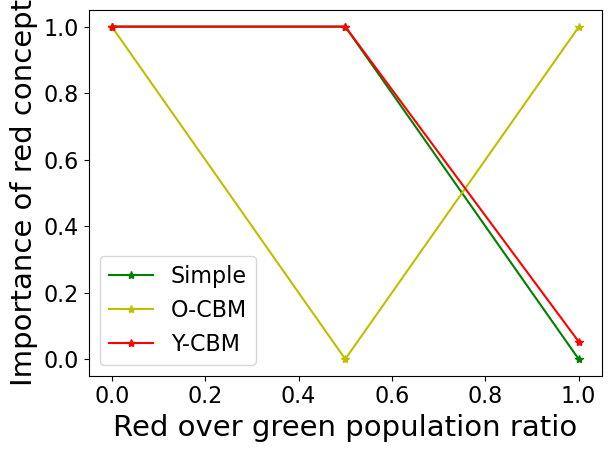

In [95]:
import numpy as np
import matplotlib
import pickle
from matplotlib import pyplot as plt

font = {'size': 21, 'family': ''}

# matplotlib.rc('font', **font)
matplotlib.rc('axes', titlesize=21)
matplotlib.rc('axes', labelsize=21)
matplotlib.rc('legend', fontsize=16)


def score_rank(scores):
    idxs = np.argsort(scores)
    r = np.empty_like(scores)
    r[idxs] = np.arange(1, len(idxs)+1)
    return r/len(scores)
    
def _norm(mu):
    return mu/np.max(np.abs(mu))
    
def _sp_norm(mu, sigma):
    _n = np.max(np.abs(mu[0]))
    return mu/_n, sigma/_n
    
model_dir = "lightning_logs/fcolor"
gt_mu, baseline_mu, tcav_mu, ocbm_mu, ycbm_mu, uace_mu = [], [], [], [], [], []
uace_sigma = []
cbes = []
for ei, eval_test_prob in enumerate([0.0, 0.5, 1.0]):
    with open(f"{model_dir}/eval-on-testm={eval_test_prob}.pkl", "rb") as f:
        cbe = pickle.load(f)
    cbes.append(cbe)

for ei, eval_test_prob in enumerate([0.0, 0.5, 1.0]):
    with open(f"{model_dir}/eval-on-testm={eval_test_prob}.pkl", "rb") as f:
        cbe = pickle.load(f)
    baseline = cbe['simple']
    tcav = cbe['tcav']
    ocbm = cbe['ocbm']
    ycbm = cbe['ycbm'][0]
    
    mu, sigma = cbe['clip_cbe']
    mu, sigma = _sp_norm(mu, sigma)
    # baseline, tcav, ocbm = score_rank(baseline[0]), score_rank(tcav[0]), score_rank(ocbm[0])
    baseline, tcav, ocbm, ycbm = _norm(baseline[0]), _norm(tcav[0]), _norm(ocbm[0]), _norm(ycbm[0])
    
    baseline_mu.append(baseline); tcav_mu.append(tcav); ocbm_mu.append(ocbm); ycbm_mu.append(ycbm)
    uace_mu.append(mu[0])
    uace_sigma.append(sigma[0])

baseline_mu, tcav_mu, ocbm_mu, ycbm_mu, uace_mu = np.array(baseline_mu), np.array(tcav_mu), np.array(ocbm_mu), np.array(ycbm_mu), np.array(uace_mu)
uace_sigma = np.array(uace_sigma)
x = [0, 0.5, 1]

idx = 0
plt.plot(x, baseline_mu[:, idx], 'g-*', label='Simple')
plt.plot(x, tcav_mu[:, idx], 'b-*', label='TCAV')
plt.plot(x, ocbm_mu[:, idx], 'y-*', label='O-CBM')
plt.plot(x, ycbm_mu[:, idx], 'r-*', label='Y-CBM')
plt.errorbar(x, uace_mu[:, idx], yerr=uace_sigma[:, idx], fmt='k-*', capsize=6, label='U-ACE')
plt.xticks(ticks=[0, 0.5, 1], labels=["0", "0.5", "1"])
_s = uace_sigma[:, idx]
plt.legend()
plt.xlabel("Fraction of red")
plt.ylabel("Importance of red")
plt.tight_layout()
plt.savefig("plots/exptA_1.pdf")
plt.show()

idx = 1
plt.plot(x, np.flip(baseline_mu[:, idx]), 'g-^', label='Simple')
plt.plot(x, np.flip(tcav_mu[:, idx]), 'b-^', label='TCAV')
plt.plot(x, np.flip(ocbm_mu[:, idx]), 'y-^', label='O-CBM')
plt.plot(x, np.flip(ycbm_mu[:, idx]), 'r-^', label='Y-CBM')
plt.errorbar(x, np.flip(uace_mu[:, idx]), yerr=np.flip(uace_sigma[:, idx]), fmt='k-', capsize=6, label='U-ACE')
plt.xticks(ticks=[0, 0.5, 1], labels=["0", "0.5", "1"])
_s = uace_sigma[:, idx]
plt.xlabel("Fraction of green")
plt.ylabel("Importance of green")
plt.tight_layout()
plt.savefig(f"plots/exptA_2.pdf")
plt.show()

idx1, idx2 = 0, 1
_sigma = np.sqrt(uace_sigma[:, idx1]**2 + uace_sigma[:, idx2]**2)
plt.plot(x, baseline_mu[:, idx1] - baseline_mu[:, idx2], 'g-*', label='Baseline')
plt.plot(x, tcav_mu[:, idx1] - tcav_mu[:, idx2], 'b-*', label='TCAV')
plt.plot(x, ocbm_mu[:, idx1] - ocbm_mu[:, idx2], 'y-*', label='O-CBM')
plt.plot(x, ycbm_mu[:, idx1] - ycbm_mu[:, idx2], 'r-*', label='Y-CBM')
plt.errorbar(x, uace_mu[:, idx1] - uace_mu[:, idx2], yerr=_sigma, fmt='k-*', capsize=6, label='U-ACE')
_s = uace_sigma[:, idx]
# plt.legend()
plt.xticks(ticks=[0, 0.5, 1], labels=["0:1", "1:1", "1:0"])
plt.xlabel("Population ratio of red to green")
plt.ylabel("Red minus Green")
plt.tight_layout()
plt.savefig(f"plots/exptA_3.pdf")
plt.show()

print(ycbm_mu.shape)
plt.plot(x, baseline_mu[:, idx2], "g-*", label='Simple')
plt.plot(x, ocbm_mu[:, idx2], "y-*", label='O-CBM')
plt.plot(x, ycbm_mu[:, idx2], "r-*", label='Y-CBM')
plt.legend()
plt.xlabel("Red over green population ratio")
plt.ylabel("Importance of red concept")
plt.tight_layout()
plt.savefig("plots/exptA.pdf")
plt.show()

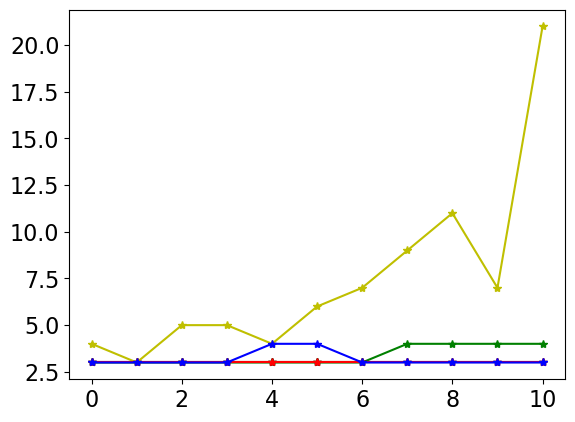

In [142]:
model_dir, mode_mix = "lightning_logs/fcolor", 0.5
gt_mu, baseline_mu, tcav_mu, ocbm_mu, ycbm_mu = [], [], [], [], []

def score_rank(scores):
    # return scores/np.abs(np.max(scores))
    idxs = np.argsort(-scores)
    r = np.empty_like(scores)
    r[idxs] = np.arange(1, len(idxs)+1)
    return r

simple_ranks, tcav_ranks, ocbm_ranks, ycbm_ranks, uace_ranks = [], [], [], [], []
for ci in range(4, 15):
    with open(f"{model_dir}/eval-on-testm={mode_mix}-over-complete-concept-and-data-with-{ci}.pkl", "rb") as f:
        cbe = pickle.load(f)
    cbes.append(cbe)
    _l = 1
    simple_ranks.append(score_rank(cbe['simple'][_l]))
    tcav_ranks.append(score_rank(cbe['tcav'][_l]))
    ocbm_ranks.append(score_rank(cbe['ocbm'][_l]))
    ycbm_ranks.append(score_rank(cbe['ycbm'][0][_l]))
    uace_ranks.append(score_rank(cbe['clip_cbe'][0][_l]))

def get(scores):
    return np.array([s[2] + s[3] for s in scores])

plt.plot(range(len(tcav_ranks)), get(simple_ranks), "g*-")
plt.plot(range(len(tcav_ranks)), get(tcav_ranks), "k*-")
plt.plot(range(len(tcav_ranks)), get(ocbm_ranks), "y*-")
plt.plot(range(len(tcav_ranks)), get(ycbm_ranks), "r*-")
plt.plot(range(len(tcav_ranks)), get(uace_ranks), "b*-")
plt.show()

In [1]:
import sys
sys.path.append('.')

## Expt C

findfont: Font family [] not found. Falling back to DejaVu Sans.


(3, 5)


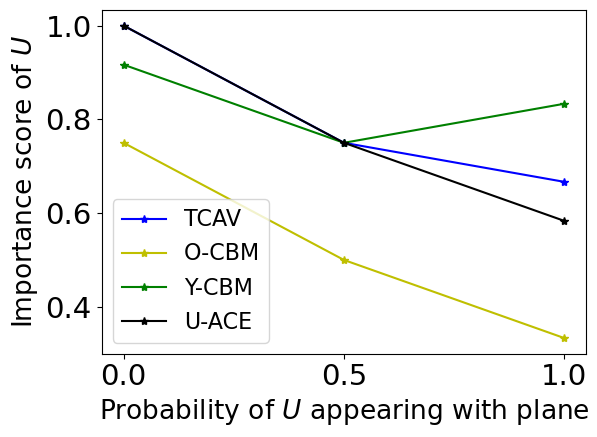

In [286]:
import numpy as np
import pickle
import matplotlib
from matplotlib import pyplot as plt
font = {'size'   : 18, 'family': ''}

# matplotlib.rc('font', **font)
matplotlib.rc('axes', titlesize=19)
matplotlib.rc('axes', labelsize=19)
matplotlib.rc('legend', fontsize=16)

model_dirs = [f"lightning_logs/tag_dataset_switch-prob={tprob}" for tprob in [0.0, 0.5, 1.0]]
arr1, arr2, arr3, arr4 = [], [], [], []

def _norm(x):
    # return [score_rank(x[0])]
    return x/np.abs(x).max()

def _sp_norm(mu, sigma):
    return mu/np.abs(mu).max(), sigma/np.abs(mu).max()

def _norm2(mu, sigma):
    samples = np.random.normal(mu, sigma, size=[1000, len(mu)])
    pos = np.repeat(np.arange(len(mu)).reshape([1, -1]), len(samples), axis=0)
    idxs = np.argsort(-samples, axis=-1)
    ranks = np.empty_like(idxs)
    ranks[np.arange(len(pos))[..., None], idxs] = len(mu) - pos
    scores = np.mean(ranks, axis=0)/len(mu)
    stddev = np.std(ranks, axis=0)/len(mu)
    return [scores], [stddev]
    
def score_rank(scores):
    idxs = np.argsort(scores)
    r = np.empty_like(scores)
    r[idxs] = np.arange(1, len(idxs)+1)
    return r/len(scores)

for model_dir in model_dirs:
    with open(f"{model_dir}/eval.pkl", "rb") as f:
        cbe = pickle.load(f)

    e1 = cbe['simple']
    mu, sigma = cbe['clip_cbe']
    # mu = mu*sigma
    # e2, e3, e4 = _norm(cbe['tcav']), _norm(cbe['ocbm']), _norm(cbe['clip_cbe-no_input_noise'][0])
    # e5, e5_sigma = _sp_norm(mu, sigma)
    e1, e2, e3, e4, e5 = cbe['simple'], cbe['tcav'], cbe['ocbm'], cbe['ycbm'][0], cbe['clip_cbe'][0]
    _fn1 = lambda _: np.abs(_[-2:]).sum()/np.abs(_[:-2]).sum()
    def _fn2(mean, sigma):
        samples = np.random.normal(loc=mean, scale=sigma, size=[1000, len(mean)])
        _s = np.abs(samples)
        vals = _s[:, -2:].sum(axis=1)/_s[:, :-2].sum(axis=1)
        return vals.mean(), vals.std()
    
    # mean, sigma = _fn2(e5[0], e5_sigma[0])
    # arr1.append([(np.abs(e1['a']) + np.abs(e1['b']))/e1['~ab'], _fn1(e2[0]), _fn1(e3[0]), _fn1(e4[0]), mean])
    # print(score_rank(e5[0]).shape)
    # print(e1[0], e1[1])
    arr1.append([score_rank(e1[0])[-2], score_rank(e2[0])[-2], score_rank(e3[0])[-2], score_rank(e4[0])[-2], score_rank(e5[0])[-2]])

arr1 = np.abs(np.array(arr1))
print(arr1.shape)
# print(arr1[-1][-1], arr2[-1][-1], _fn1(e5[0]), _fn2(e5[0]))

x = [0, 0.5, 1.0]
# plt.plot(x, arr1[:, 0], 'r-*', label='Simple')
plt.plot(x, arr1[:, 1], 'b-*', label='TCAV')
plt.plot(x, arr1[:, 2], 'y-*', label='O-CBM')
plt.plot(x, arr1[:, 3], 'g-*', label='Y-CBM')
plt.plot(x, arr1[:, 4], 'k-*', label='U-ACE')
plt.xticks([0, 0.5, 1])
# plt.fill_between(x, arr1[:, 4] - sigmas, arr1[:, 4] + sigmas, alpha=0.3, facecolor='k')
plt.xlabel('Probability of $U$ appearing with plane')
plt.ylabel("Importance score of $U$")
# plt.title('Relative importance of Tag vs core concepts')
plt.legend()
plt.tight_layout()
plt.savefig('plots/exptC.pdf')
plt.show()

## Sensitivity to nuisance concepts

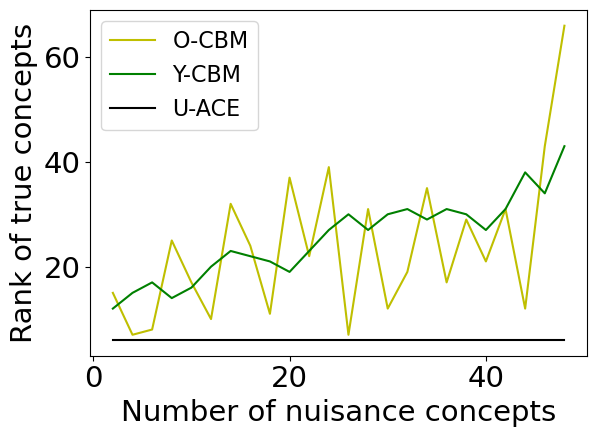

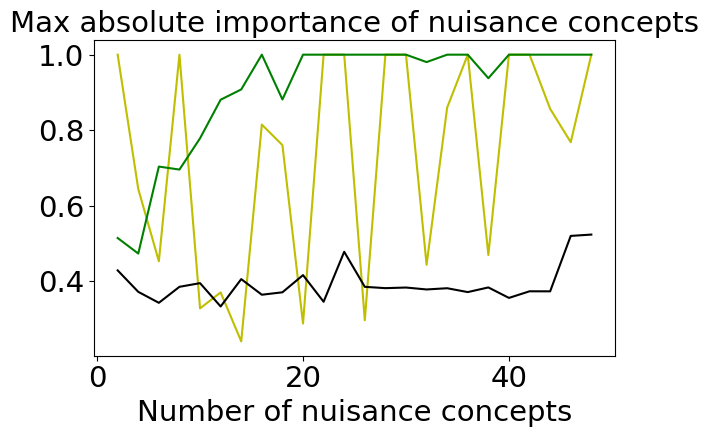

In [278]:
from matplotlib import pyplot as plt

model_dir = "lightning_logs/tag_dataset_switch-prob=0.5"
arr1, arr2, arr3 = [], [], []
num = 25
matplotlib.rc('axes', titlesize=21)
matplotlib.rc('axes', labelsize=21)
matplotlib.rc('legend', fontsize=16)

def score_rank(scores):
    idxs = np.argsort(-scores)
    r = np.empty_like(scores)
    r[idxs] = np.arange(1, len(idxs)+1)
    return r #/(3*len(scores))


for ai in range(1, num):
    with open(f"{model_dir}/exptd_{2*ai}.pkl", "rb") as f:
        cbe = pickle.load(f)
    e1, e2 = cbe['ocbm'][0], cbe['ycbm'][0]
    e3, e4 = cbe['clip_cbe-no_input_noise'][0][0], cbe['clip_cbe'][0][0]

    e1 = e1/np.abs(e1).max()
    e2 = e2/np.abs(e2).max()
    e3 = e3/np.abs(e3).max()
    e4 = e4/np.abs(e4).max()
#     # print(e1, e2)
    
    idx = 10
    a1, b1 = np.mean(np.abs(e1[idx:])), np.abs(e1[idx:]).max()
    a2, b2 = np.mean(np.abs(e2[idx:])), np.abs(e2[idx:]).max()
    a3, b3 = np.mean(np.abs(e3[idx:])), np.abs(e3[idx:]).max()
    a4, b4 = np.mean(np.abs(e4[idx:])), np.abs(e4[idx:]).max()
    
    c1, c2, c3, c4 = score_rank(e1)[:3].sum(), score_rank(e2)[:3].sum(), score_rank(e3)[:3].sum(), score_rank(e4)[:3].sum()
    # arr1.append((a1, a2, a3))
    arr2.append((b1, b2, b3, b4))
    arr3.append((c1, c2, c3, c4))
    

arr3 = np.array(arr3)
plt.plot(list(range(2, 2*num, 2)), arr3[:, 0], 'y-', label='O-CBM')
plt.plot(list(range(2, 2*num, 2)), arr3[:, 1], 'g-', label='Y-CBM')
# plt.plot(list(range(2, 2*num, 2)), arr3[:, 2], 'b-', label='U-ACE - corr')
plt.plot(list(range(2, 2*num, 2)), arr3[:, 3], 'k-', label='U-ACE')
plt.ylabel("Rank of true concepts")
# plt.ylabel("")
plt.xlabel("Number of nuisance concepts")
plt.tight_layout()
plt.legend()
plt.savefig("plots/exptD_1.pdf")
plt.show()

arr2 = np.array(arr2)
plt.plot(list(range(2, 2*num, 2)), arr2[:, 0], 'y-', label='O-CBM')
plt.plot(list(range(2, 2*num, 2)), arr2[:, 1], 'g-', label='Y-CBM')
# plt.plot(list(range(2, 2*num, 2)), arr2[:, 2], 'b-', label='U-ACE - corr')
plt.plot(list(range(2, 2*num, 2)), arr2[:, 3], 'k-', label='U-ACE')
plt.title("Max absolute importance of nuisance concepts")
# plt.ylabel("Abs. Importance")
plt.xlabel("Number of nuisance concepts")
plt.tight_layout()
# plt.legend()
plt.savefig("plots/exptD_2.pdf")
plt.show()

In [195]:
arr2

array([[1.        , 0.        , 0.70436183, 0.42938471],
       [0.64468765, 0.        , 0.49999459, 0.37262276],
       [0.45344355, 0.        , 0.50361652, 0.34360099],
       [1.        , 0.        , 0.46558641, 0.3859112 ]])

## Broden dataset expts

In [260]:
import pickle
import numpy as np
import pandas as pd
from datasets.broden_dataset import BrodenDataset
from matplotlib import pyplot as plt

from pyemd import emd
from clip import clip

clip_model, clip_preprocess = clip.load("ViT-B/32", device='cpu')


cache_fldr = f"/scratch/vp421/data/ade20k"
bfldr = "/scratch/vp421/data/broden1_224"

"""
Ranking distance metrics: https://theory.stanford.edu/~sergei/slides/www10-metrics.pdf
"""
def tau_score(ranks1, ranks2):
    """
    They should be already sorted
    """
    n = len(ranks2)
    uids = np.unique(np.concatenate([ranks1, ranks2]))
    cache = {}
    for ui, uid in enumerate(ranks1):
        cache[uid] = [ui, -1]
    for ui, uid in enumerate(ranks2):
        if uid not in cache:
            cache[uid] = [-1, -1]
        cache[uid] = [cache[uid][0], ui]
    
    tau_score, active_pairs = 0, 0
    for ui1 in range(n-1):
        for ui2 in range(ui1+1, n):
            uid1, uid2 = uids[ui1], uids[ui2]
            r1, r2 = cache[uid1], cache[uid2]
            # just checking if the pair is present in both the lists
            if r1[0] >= 0 and r2[0] >= 0 and r1[1] >= 0 and r2[1] >= 0:
                active_pairs += 1
                score = int(np.sign(r1[0] - r2[0]) != np.sign(r1[1] - r2[1]))
                tau_score += score
    return tau_score/active_pairs

def spearman_footrule(ranks1, ranks2):
    val = 0
    for ri in range(len(ranks1)):
        sigma_i = ranks2.index(ranks1[ri])
        val += abs(sigma_i - ri)
    return val/len(ranks1)

def wmd(rank1, rank2):    
    rank1, rank2 = rank1[:10], rank2[:10]
    vocab = np.unique(np.concatenate([rank1, rank2]))

    hist1 = np.zeros(len(vocab))
    hist2 = np.zeros(len(vocab))
    for wi, w in enumerate(vocab):
        if w in rank1:
            hist1[wi] = 1.
        if w in rank2:
            hist2[wi] = 1.

    embs = clip_model.encode_text(clip.tokenize(vocab))
    embs = embs.detach().numpy()
    embs = embs/np.expand_dims(np.linalg.norm(embs, axis=-1), axis=-1)
    dist_mat = 1 - np.matmul(embs, np.transpose(embs))
    dist_mat = dist_mat.astype(np.float64)

    return emd(hist1, hist2, dist_mat)

def wmd2(rank1, rank2):
    rank1, rank2 = rank1[:20], rank2[:20]

    emb1, emb2 = clip_model.encode_text(clip.tokenize(rank1)), clip_model.encode_text(clip.tokenize(rank2))
    emb1, emb2 = emb1.detach().numpy(), emb2.detach().numpy()
    emb1, emb2 = emb1/np.expand_dims(np.linalg.norm(emb1, axis=-1), axis=-1), emb2/np.expand_dims(np.linalg.norm(emb2, axis=-1), axis=-1)
    dist_mat = 1 - np.matmul(emb2, np.transpose(emb1))
    print(dist_mat.min(axis=-1))
    return dist_mat.min(axis=-1).mean()   

def stable_argsort(scores, concepts):
    arr = np.array(list(zip(-scores, concepts)), dtype=[('score', np.float32), ('name', np.str_)])
    return np.argsort(arr, kind='stable', order=['score', 'name'])

def get_rank(scores):
    idxs = list(stable_argsort(scores, concepts))
    return np.array([idxs.index(idx) + 1 for idx in range(len(scores))])/len(scores)

def get_rank2(mean, sigma):
    N = 100
    samples = np.random.normal(-mean, sigma, size=[N, len(mean)])
    ranks = np.empty_like(samples)
    # idxs = np.argsort(samples, axis=-1)
    idxs = np.array([list(stable_argsort(samples[_idx], concepts)) for _idx in range(len(samples))])
    ranks[np.arange(N)[..., None], idxs] = np.repeat(np.arange(len(mean)).reshape([1, -1])+1, len(samples), axis=0)
    return ranks.mean(axis=0)/len(mean)

dat = BrodenDataset('ade20k', cache_fldr, bfldr)
concepts = dat.concept_names

with open("lightning_logs/expte_ade20k.pkl", "rb") as f:
    ade_expls = pickle.load(f)[0]
    with open("lightning_logs/expte_ade20k_tcav.pkl", "rb") as f:
        tcav_cbe = pickle.load(f)[0]
    ade_expls['tcav'] = tcav_cbe['tcav']
    
with open("lightning_logs/expte_pascal.pkl", "rb") as f:
    pascal_expls = pickle.load(f)[0]
    with open("lightning_logs/expte_pascal_tcav.pkl", "rb") as f:
        tcav_cbe = pickle.load(f)[0]
    pascal_expls['tcav'] = tcav_cbe['tcav']

# pascal_expls = ade_expls
ade_mean, ade_sigma = ade_expls['clip_cbe'][0], ade_expls['clip_cbe'][1]
pascal_mean, pascal_sigma = pascal_expls['clip_cbe'][0], pascal_expls['clip_cbe'][1]
o_ade_mean, o_pascal_mean = ade_mean*ade_sigma, pascal_mean*pascal_sigma

pascal_uace_med, _ = pascal_expls['uace_medium'][0], pascal_expls['uace_medium'][1]

diff = np.abs(o_ade_mean - o_pascal_mean)

# print(pascal_expls["simple"].shape)
# print(pascal_expls["ocbm"].shape)
# print(pascal_expls["ycbm"].shape)
scores = []
for _i in range(50):
    print(f"----------\n{_i}")

    lt = 10
    pascal_simple = pascal_expls['simple']

    simple_expls = [concepts[_ii] for _ii in stable_argsort(pascal_simple[_i], concepts) if pascal_simple[_i][_ii]>0]
    print("Simple len:", len(simple_expls))
    print("Simple:", simple_expls[:lt])
    
    pascal_tcav = pascal_expls['tcav']
    tcav_expls = [concepts[_ii] for _ii in stable_argsort(pascal_tcav[_i], concepts)]
    print("TCAV:", tcav_expls[:lt])
    
    pascal_ocbm = pascal_expls['ocbm']
    ocbm_expls = [concepts[_ii] for _ii in stable_argsort(pascal_ocbm[_i], concepts)]
    print("O-CBM:", ocbm_expls[:lt])
    
    pascal_ycbm = pascal_expls['ycbm']
    ycbm_expls = [concepts[_ii] for _ii in stable_argsort(pascal_ycbm[_i], concepts)]
    print("y-CBM:", ycbm_expls[:lt])

    _idxs = stable_argsort(pascal_uace_med[_i], concepts)
    uace_med_expls = [concepts[_ii] for _ii in _idxs]
    print("U-ACE (med):", uace_med_expls[:lt])
    
    _idxs = stable_argsort(pascal_mean[_i], concepts)
    uace_expls = [concepts[_ii] for _ii in _idxs]
    print("U-ACE:", uace_expls[:lt])
    
    ocbm_score, uace_score = tau_score(simple_expls, ocbm_expls), tau_score(simple_expls, uace_expls)
    ycbm_score = tau_score(simple_expls, ycbm_expls)
    tcav_score = tau_score(simple_expls, tcav_expls)
    uace_m_score = tau_score(simple_expls, uace_med_expls)
    ocbm_sp_score, uace_sp_score = spearman_footrule(simple_expls, ocbm_expls), spearman_footrule(simple_expls, uace_expls)
    ocbm_wmd_score, uace_wmd_score = wmd(simple_expls, ocbm_expls), wmd(simple_expls, uace_expls)
    
    rs_simple, rs_tcav, rs_ocbm, rs_ycbm = get_rank(pascal_simple[_i]), get_rank(pascal_tcav[_i]), get_rank(pascal_ocbm[_i]), get_rank(pascal_ycbm[_i])
    # rs_uace = get_rank2(o_pascal_mean[_i], pascal_sigma[_i])
    uace_mu, uace_sigma = pascal_expls['clip_cbe'][0], pascal_expls['clip_cbe'][1]
    rs_uace = get_rank(uace_mu[_i])
    rs_uace_m = get_rank(pascal_expls['uace_medium'][0][_i])
    select_idxs = np.argsort(-pascal_simple[_i])[:20]
    print(len(select_idxs))
    xm = lambda _: (np.abs(_-rs_simple)[select_idxs]).mean()
    scores.append([tcav_score, ocbm_score, ycbm_score, uace_m_score, uace_score, xm(rs_tcav), xm(rs_ocbm), xm(rs_ycbm), xm(rs_uace_m), xm(rs_uace)])
    print("TCAV tau:", tcav_score, xm(rs_tcav))
    print("OCBM tau:", ocbm_score, xm(rs_ocbm))
    print("YCBM tau:", ycbm_score, xm(rs_ycbm))
    print("UACE (med) tau:", uace_m_score, xm(rs_uace_m)) 
    print("UACE tau:", uace_score, xm(rs_uace)) 
        
    print('--------')
    
print(np.array(scores).mean(axis=0))

----------
0
Simple len: 16
Simple: ['snow', 'motorbike', 'wheel', 'airplane', 'signboard', 'foot', 'bus', 'poster', 'arm', 'body']
TCAV: ['wall', 'floor', 'wood', 'fabric', 'table', 'eye', 'metal', 'plant', 'painting', 'ground']
O-CBM: ['jacket', 'price tag', 'canister', 'waffled', 'fork', 'machine', 'ladder', 'basket', 'motorbike', 'meat']
y-CBM: ['blade', 'ice rink', 'ice', 'backplate', 'carousel', 'crosswalk', 'bicycle', 'runway', 'helmet', 'shaft']
U-ACE (med): ['bathrobe', 'wire', 'snow', 'kitchen island', 'figurine', 'curb', 'red', 'wall', 'front', 'double door']
U-ACE: ['ice rink', 'minibike', 'runway', 'bullring', 'snow', 'crosswalk', 'catwalk', 'ride', 'aircraft carrier', 'motorbike']
20
TCAV tau: 0.6166666666666667 0.5368493150684932
OCBM tau: 0.39166666666666666 0.16623287671232878
YCBM tau: 0.48333333333333334 0.17486301369863014
UACE (med) tau: 0.38333333333333336 0.39945205479452056
UACE tau: 0.25833333333333336 0.21849315068493147
--------
----------
1
Simple len: 20
Si

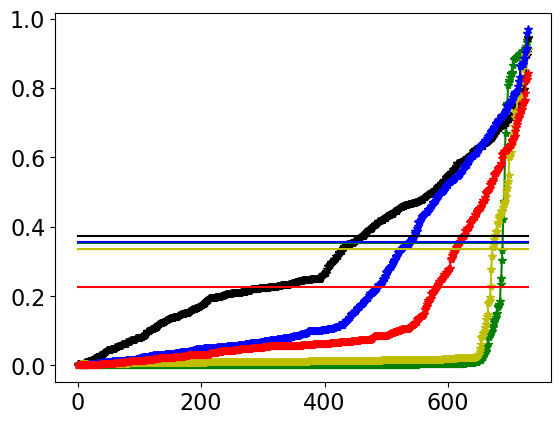

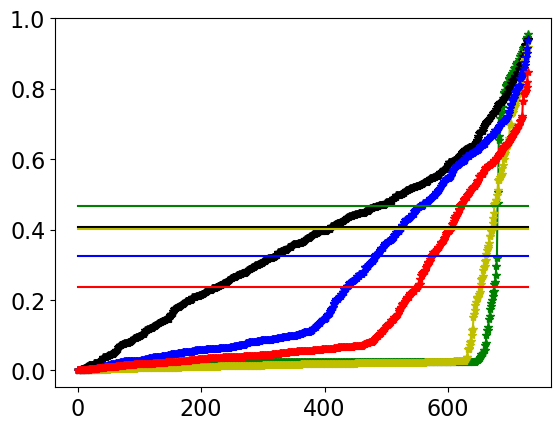

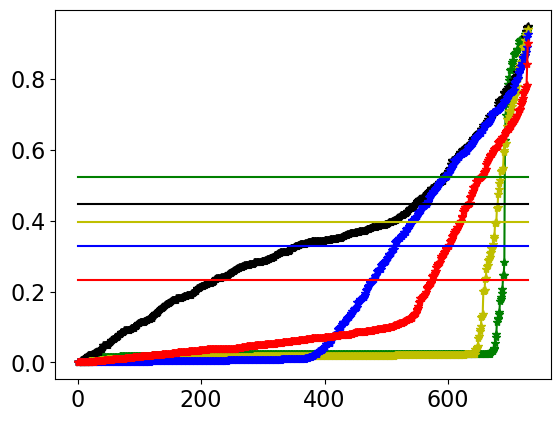

[0.40596335 0.40605781 0.32176385 0.33630479 0.2312511 ]


In [97]:
idx = concepts.index('cat')
_i = 40

with open("lightning_logs/expte_ade20k.pkl", "rb") as f:
    ade_expls = pickle.load(f)[0]
    
with open("lightning_logs/expte_pascal.pkl", "rb") as f:
    pascal_expls = pickle.load(f)[0]

def get_rank(scores):
    idxs = list(stable_argsort(scores, concepts))
    return np.array([idxs.index(idx) + 1 for idx in range(len(scores))])/len(scores)

scores = []
plot_idxs = np.random.choice(50, [3])
for _i in range(50):
    ade_mean, ade_sigma = ade_expls['clip_cbe'][0], ade_expls['clip_cbe'][1]
    pascal_mean, pascal_sigma = pascal_expls['clip_cbe'][0], pascal_expls['clip_cbe'][1]
    o_ade_mean, o_pascal_mean = ade_mean*ade_sigma, pascal_mean*pascal_sigma
    ranks1 = get_rank2(o_ade_mean[_i], ade_sigma[_i])
    ranks2 = get_rank2(o_pascal_mean[_i], pascal_sigma[_i])
    ranks1, ranks2 = get_rank(ade_mean[_i]), get_rank(pascal_mean[_i])
    # _s = np.sqrt(ade_sigma[_i]**2 + pascal_sigma[_i]**2)
    # ranks1, ranks2 = o_ade_mean[_i]/_s, o_pascal_mean[_i]/_s
    
    # def xm(r1, r2):
    #     diff = np.abs(r1-r2)
    #     ln = len(np.where(diff != 0)[0])
    #     return diff.sum()/ln
    
    xm = lambda r1, r2: np.abs(r1-r2)
    _ranks1, _ranks2 = get_rank(ade_mean[_i]), get_rank(pascal_mean[_i])
    simple_ranks1, simple_ranks2 = get_rank(ade_expls['simple'][_i]), get_rank(pascal_expls['simple'][_i])
    tcav_ranks1, tcav_ranks2 = get_rank(ade_expls['tcav'][_i]), get_rank(pascal_expls['tcav'][_i])
    ocbm_ranks1, ocbm_ranks2 = get_rank(ade_expls['ocbm'][_i]), get_rank(pascal_expls['ocbm'][_i])
    ycbm_ranks1, ycbm_ranks2 = get_rank(ade_expls['ycbm'][_i]), get_rank(pascal_expls['ycbm'][_i])
    simple_rdiff, tcav_rdiff, ocbm_rdiff, ycbm_rdiff = xm(simple_ranks1, simple_ranks2), xm(tcav_ranks1, tcav_ranks2), xm(ocbm_ranks1, ocbm_ranks2), xm(ycbm_ranks1, ycbm_ranks2)
    uace_rdiff = xm(ranks1, ranks2)

    # select_idxs = np.array(list(set(np.argsort(np.abs(ade_expls['simple'][_i]))[-20:]).union(np.argsort(np.abs(pascal_expls['simple'][_i]))[-20:])))
    select_idxs = np.arange(len(ade_expls['simple'][_i]))

    if _i in plot_idxs:
        plt.plot(np.arange(len(select_idxs)), np.sort(simple_rdiff[select_idxs]), "g*-")
        plt.plot(np.arange(len(select_idxs)), np.sort(tcav_rdiff[select_idxs]), "k*-")
        plt.plot(np.arange(len(select_idxs)), np.sort(ycbm_rdiff[select_idxs]), "y*-")
        plt.plot(np.arange(len(select_idxs)), np.sort(ocbm_rdiff[select_idxs]), "b*-")
        # idxs = np.argsort(uace_rdiff)
        plt.plot(np.arange(len(select_idxs)), np.sort(uace_rdiff[select_idxs]), "r*-")

    def _xm2(v, method, _i):
        # ln = len(np.where(v!=0)[0])
        if method != 'clip_cbe':
            ln = len(np.where(ade_expls[method][_i]!=0)[0]) + len(np.where(pascal_expls[method][_i]!=0)[0])
        else:
            ln = len(np.where(ade_expls[method][0][_i]!=0)[0]) + len(np.where(pascal_expls[method][0][_i]!=0)[0])
        # print(np.sum(v), method, ln)
        return np.sum(v)/ln

    simple_auc, tcav_auc, ocbm_auc, ycbm_auc, uace_auc = _xm2(simple_rdiff[select_idxs], 'simple', _i), _xm2(tcav_rdiff[select_idxs], 'tcav', _i), _xm2(ocbm_rdiff[select_idxs], 'ocbm', _i), _xm2(ycbm_rdiff[select_idxs], 'ycbm', _i), _xm2(uace_rdiff[select_idxs], 'clip_cbe', _i)
    if _i in plot_idxs:
        plt.plot((0, len(select_idxs)), (simple_auc, simple_auc), "g-")
        plt.plot((0, len(select_idxs)), (tcav_auc, tcav_auc), "k-")
        plt.plot((0, len(select_idxs)), (ocbm_auc, ocbm_auc), "b-")
        plt.plot((0, len(select_idxs)), (ycbm_auc, ycbm_auc), "y-")
        plt.plot((0, len(select_idxs)), (uace_auc, uace_auc), "r-")
    plt.show()
    scores.append([simple_auc, tcav_auc, ocbm_auc, ycbm_auc, uace_auc])
    # plt.yscale('log')
    # plt.plot(np.arange(len(ranks1)), np.abs(_ranks1 - _ranks2), "b*")
    # print(np.mean(np.abs(ranks1-ranks2)), np.mean(np.abs(_ranks1-_ranks2)))
    # print(ranks1[idx], ranks2[idx])
    # print(_ranks1[idx], _ranks2[idx])
    # print(ade_mean[2][idx], pascal_mean[2][idx])
    # print(ade_sigma[2][idx], pascal_sigma[2][idx])
    
print(np.array(scores).mean(axis=0))

## Hparam sensitivity of Y-CBM and O-CBM

In [284]:
import pickle
import numpy as np
import pandas as pd
from datasets.broden_dataset import BrodenDataset
from matplotlib import pyplot as plt

from pyemd import emd
from clip import clip
import tqdm 

clip_model, clip_preprocess = clip.load("ViT-B/32", device='cpu')


cache_fldr = f"/scratch/vp421/data/ade20k"
bfldr = "/scratch/vp421/data/broden1_224"

def stable_argsort(scores, concepts):
    arr = np.array(list(zip(-scores, concepts)), dtype=[('score', np.float32), ('name', np.str_)])
    return np.argsort(arr, kind='stable', order=['score', 'name'])

def get_rank(scores):
    idxs = list(stable_argsort(scores, concepts))
    return np.array([idxs.index(idx) + 1 for idx in range(len(scores))])/len(scores)

dat = BrodenDataset('ade20k', cache_fldr, bfldr)
concepts = dat.concept_names

with open("lightning_logs/expte_pascal.pkl", "rb") as f:
    pascal_o_expls = pickle.load(f)[0]
    pascal_simple = pascal_o_expls['simple']
with open("lightning_logs/broden_hparam_pascal.pkl", "rb") as f:
    pascal_expls = pickle.load(f)
    # pascal_expls['ocbm'] = pascal_o_expls['ocbm']
    # pascal_expls['ycbm'] = pascal_o_expls['ycbm']
    
with open("lightning_logs/expte_ade20k.pkl", "rb") as f:
    ade_o_expls = pickle.load(f)[0]
    ade_simple = ade_o_expls['simple']
    with open("lightning_logs/expte_ade20k_tcav.pkl", "rb") as f:
        tcav_cbe = pickle.load(f)[0]
    ade_o_expls['tcav'] = tcav_cbe['tcav']

with open("lightning_logs/broden_hparam_ade20k.pkl", "rb") as f:
    ade_expls = pickle.load(f)
    # ade_expls['ocbm'] = ade_o_expls['ocbm']
    # ade_expls['ycbm'] = ade_o_expls['ycbm']

ocbm_keys = [f"ocbm_C={v}" for v in [1e-2, 0.1, 1, 10]]
ycbm_keys = [f"ycbm_alpha={v}" for v in [1e-4, 1e-3, 1e-1, 1]]
for dataset in ['pascal', 'ade20k']:
    if dataset == 'pascal':
        simple = pascal_simple
        expls = pascal_expls
        o_expls = pascal_o_expls
    else:
        simple = ade_simple
        expls = ade_expls
        o_expls = ade_o_expls
    scores1, scores2, scores3 = [], [], []
    for _i in tqdm.tqdm(range(50)):
        rs_ocbm = [expls[k][_i] for k in ocbm_keys]
        rs_ycbm = [expls[k][_i] for k in ycbm_keys]
        rs_simple = get_rank(simple[_i])
        select_idxs = np.argsort(-simple[_i])[:20]
        xm = lambda _: (np.abs(get_rank(_)-rs_simple)[select_idxs]).mean()
        simple_expls = [concepts[_ii] for _ii in stable_argsort(simple[_i], concepts)]
        def tau_xm(_):
            _ = [concepts[_ii] for _ii in stable_argsort(_, concepts)]
            return tau_score(simple_expls, _)
        scores1.append(list(map(xm, rs_ocbm)) + [xm(o_expls['clip_cbe'][0][_i])])
        scores2.append(list(map(xm, rs_ycbm)))
        scores3.append([xm(o_expls['uace_medium'][0][_i]), xm(o_expls['uace_none'][0][_i]), xm(o_expls['clip_cbe_kappa=0'][0][_i])])
        
        # tau_scores1.append(list(map(tau_xm, rs_ocbm)))
        # tau_scores2.append(list(map(tau_xm, rs_ycbm)))
        # tau_score_uace.append([tau_xm(o_expls['clip_cbe'][0][_i])])

    print(np.array(scores1).mean(axis=0))
    print(np.array(scores2).mean(axis=0))
    print(np.array(scores3).mean(axis=0))
    # print(":::::")
    # print(np.array(tau_scores1).mean(axis=0))
    # print(np.array(tau_scores2).mean(axis=0))
    # print(np.array(tau_score_uace).mean(axis=0))
    print("-------------")
    
scores = []
for _i in range(50):
    lst1 = [pascal_simple[_i]] 
    lst1 += [pascal_expls[k][_i] for k in ocbm_keys]
    lst1 += [pascal_expls[k][_i] for k in ycbm_keys]
    lst1 += [pascal_o_expls['uace_medium'][0][_i]]
    lst1 += [pascal_o_expls['uace_none'][0][_i]]
    lst1 += [pascal_o_expls['clip_cbe_kappa=0'][0][_i]]
    lst1 += [pascal_o_expls['clip_cbe'][0][_i]]
    
    lst2 = [ade_simple[_i]]
    lst2 += [ade_expls[k][_i] for k in ocbm_keys]
    lst2 += [ade_expls[k][_i] for k in ycbm_keys]
    lst2 += [ade_o_expls['uace_medium'][0][_i]]
    lst2 += [ade_o_expls['uace_none'][0][_i]]
    lst2 += [ade_o_expls['clip_cbe_kappa=0'][0][_i]]
    lst2 += [ade_o_expls['clip_cbe'][0][_i]]
    _s = []
    for ei in range(len(lst1)):
        s = np.abs(get_rank(lst1[ei]) - get_rank(lst2[ei])).sum()
        num = len(np.nonzero(lst1[ei])[0]) + len(np.nonzero(lst2[ei])[0])
        _s.append(s/num)
    scores.append(_s)

print(np.array(scores).mean(axis=0))

100%|██████████| 50/50 [00:03<00:00, 12.54it/s]


[0.10522192 0.10926712 0.24564658 0.35458356 0.15913151]
[0.26944795 0.13279863 0.10747671 0.10742603]
[0.45054795 0.39805616 0.21846712]
-------------


 76%|███████▌  | 38/50 [00:03<00:00, 12.16it/s]


KeyboardInterrupt: 

In [286]:
for y in [7, 8]:
    print(", ".join([concepts[idx] for idx in np.argsort(-ade_o_expls['tcav'][y])[:10]]))
    print(", ".join([concepts[idx] for idx in np.argsort(-ade_o_expls['uace_medium'][0][y])[:10]]))
    print(", ".join([concepts[idx] for idx in np.argsort(-ade_o_expls['uace_none'][0][y])[:10]]))
    print(", ".join([concepts[idx] for idx in np.argsort(-ade_o_expls['ocbm'][y])[:10]]))
    print(", ".join([concepts[idx] for idx in np.argsort(-ade_o_expls['ycbm'][y])[:10]]))
    print(", ".join([concepts[idx] for idx in np.argsort(-ade_o_expls['clip_cbe'][0][y])[:10]]))
    print("-----")

palm, horse, pane of glass, helicopter, rubbish, cap, boat, organ, tent, footbridge
net, merchandise, labyrinth, black, big top, pigeonhole, ottoman, chest, tree, sky
oar, forest, pigeonhole, merchandise, sand trap, net, wallpaper, tray, calendar, tree
forest, pot, pottedplant, hedge, trestle, sweater, bush, leaf, foliage, coat
field, forest, foliage, elevator, gravestone, hedge, bush, vineyard, covered bridge, baptismal font
foliage, forest, grass, field, hedge, covered bridge, tree, leaves, bush, gravestone
-----
shutter, manhole, baby buggy, umbrella, sand, boat, arch, minibike, rubbish, column
wineglass, guitar, headlight, chest, jersey, roundabout, witness stand, magazine, folding door, shaft
lake, headlight, island, hen, dog, chest, jersey, mosque, shaft, windshield
sea, island, lighthouse, cliff, wave, shore, rock, sand, pitted, crystalline
sea, sand, lake, island, runway, cliff, fog bank, clouds, towel rack, pier
sea, lake, island, pier, cliff, lighthouse, shore, fog bank, wate

## Expt. F

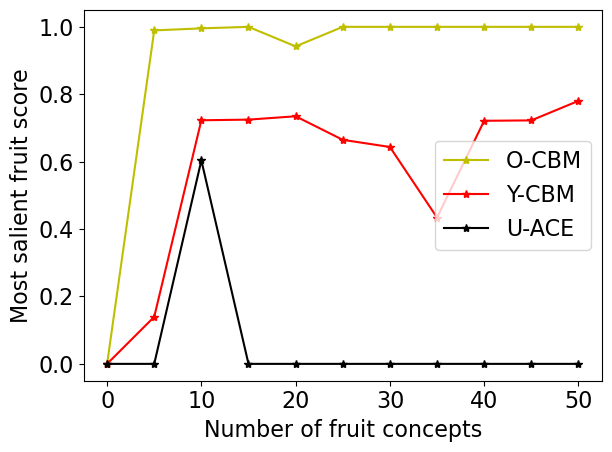

In [82]:
import matplotlib

font = {'size'   : 16, 'family': ''}

matplotlib.rc('font', **font)

uace_dat, ocbm_dat, ycbm_dat = [0], [0], [0]
for num_concepts in range(9, 55, 5):
    with open(f"lightning_logs/new_fcolor_modemix=0.5/eval-on-testm=0.5-over-complete-concept-with={num_concepts}.pkl", "rb") as f:
        x = pickle.load(f)
    ycbm_expl = x["ycbm"][0]
    ocbm_expl = x["ocbm"][0]
    uace_expl = x["clip_cbe"][0][0] #/x["clip_cbe"][1][0]
    # ycbm_expl, ocbm_expl, uace_expl = get_rank(ycbm_expl), get_rank(ocbm_expl), get_rank(uace_expl)
    # print(np.abs(ocbm_expl[:4]).mean(), np.abs(ocbm_expl[4:]).mean())
    # print(np.abs(ocbm_expl[:4]).max(), np.abs(ocbm_expl[4:]).max())
    # print(np.abs(ycbm_expl[:4]).mean(), np.abs(ycbm_expl[4:]).mean())
    # print(np.abs(ycbm_expl[:4]).max(), np.abs(ycbm_expl[4:]).max())
    # print(np.abs(uace_expl[:4]).mean(), np.abs(uace_expl[4:]).mean())
    # print(np.abs(uace_expl[:4]).max(), np.abs(uace_expl[4:]).max())
    ocbm_dat.append(np.abs(ocbm_expl[4:]).max()/np.abs(ocbm_expl).max())
    ycbm_dat.append(np.abs(ycbm_expl[4:]).max()/np.abs(ycbm_expl).max())
    uace_dat.append(np.abs(uace_expl[4:]).max()/np.abs(uace_expl).max())
    # ocbm_dat.append(ocbm_expl[:4].mean())
    # ycbm_dat.append(ycbm_expl[:4].mean())
    # uace_dat.append(uace_expl[:4].mean())
    
    # ocbm_dat.append(np.abs(ocbm_expl[4:]).mean()/np.abs(ocbm_expl[:4]).mean())
    # ycbm_dat.append(np.abs(ycbm_expl[4:]).mean()/np.abs(ycbm_expl[:4]).mean())
    # uace_dat.append(np.abs(uace_expl[4:]).mean()/np.abs(uace_expl[:4]).mean())
    
x = np.array(list(range(4, 55, 5))) - 4
plt.plot(x, ocbm_dat, "y*-", label="O-CBM")
plt.plot(x, ycbm_dat, "r*-", label="Y-CBM")
plt.plot(x, uace_dat, "k*-", label="U-ACE")
plt.legend()
plt.ylabel("Most salient fruit score")
plt.xlabel("Number of fruit concepts")
# plt.ylim(0, 1.6)
plt.tight_layout()
plt.savefig("plots/exptF.pdf")
plt.show()

## Expt G

[-0.1088568  0.         0.         0.       ]
[-1.85178807 -1.9391409   1.56946427  1.55954055] [-75.41235702  21.87358806  -1.39114725 -23.15427809]


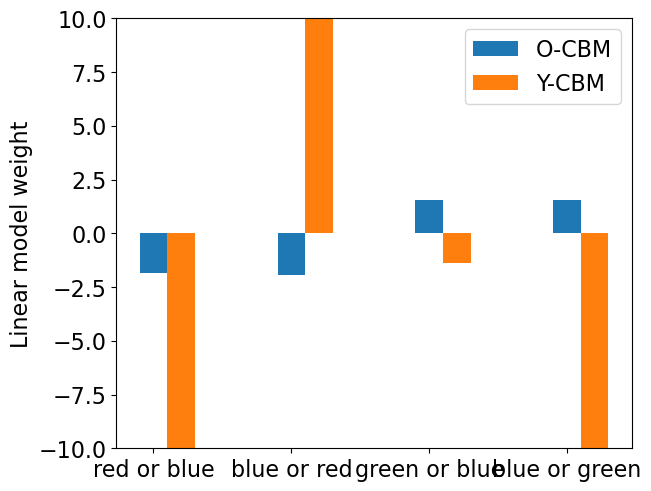

In [91]:
with open("lightning_logs/new_fcolor_modemix=0.5/eval-on-testm=0.5-under-complete-concept.pkl", "rb") as f:
    x = pickle.load(f)
    
    ocbm_mu = x['ocbm'][0]
    
    ycbm_mu = x['ycbm'][0]
    
    mu, sigma = x['clip_cbe']
    print((mu*sigma)[0])
    
    means = {
        'O-CBM': ocbm_mu,
        'Y-CBM': ycbm_mu,
    }
    print(ocbm_mu, ycbm_mu)

    x = np.arange(4)  # the label locations
    width = 0.2  # the width of the bars
    multiplier = 1
    
    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        # ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Linear model weight')
    ax.set_title('')
    ax.set_xticks(x + width, ["red or blue", "blue or red", "green or blue", "blue or green"])
    ax.legend()
    # ax.set_yscale('log')
    ax.set_ylim(-10, 10)


/tmp/ipykernel_32753/1318207220.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


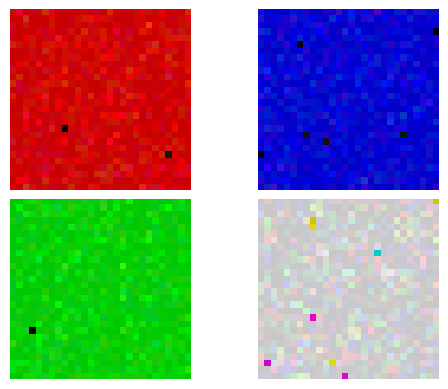

In [26]:
# import sys
# sys.path.append(".")
from matplotlib import pyplot as plt
from datasets import four_color
import torch
import numpy as np

dat = four_color.FColor()
fig, axis = plt.subplots(2, 2, gridspec_kw={'wspace':0, 'hspace':0.05}, squeeze=True)
fig.tight_layout()

found = [False, False, False, False]
for x, y, g in dat.get_train_dataset():
    g = np.where(g>0)[0][0]
    if not found[g]:
        found[g] = True
        axis[g%2, g//2].axis('off')
        axis[g%2, g//2].imshow(torch.permute(x, [1, 2, 0]))
plt.savefig("plots/four_color.pdf", bbox_inches='tight')
plt.show()

In [87]:
import pickle
import os
import numpy as np


def stable_argsort(scores, concepts):
    arr = np.array(list(zip(-scores, concepts)), dtype=[('score', np.float32), ('name', np.str_)])
    return np.argsort(arr, kind='stable', order=['score', 'name'])

def get_rank(scores):
    idxs = list(stable_argsort(scores, concepts))
    return np.array([idxs.index(idx) + 1 for idx in range(len(scores))])/len(scores)
    # return scores/np.abs(scores).max()

with open("lightning_logs/cub_expls.pkl", "rb") as f:
    x = pickle.load(f)

concepts = ['bill shape is dagger', 'bill shape is hooked seabird', 'bill shape is all-purpose', 'bill shape is cone', 'wing color is brown', 'wing color is grey', 'wing color is yellow', 'wing color is black', 'wing color is white', 'wing color is buff', 'upperparts color is brown', 'upperparts color is grey', 'upperparts color is yellow', 'upperparts color is black', 'upperparts color is white', 'upperparts color is buff', 'underparts color is brown', 'underparts color is grey', 'underparts color is yellow', 'underparts color is black', 'underparts color is white', 'underparts color is buff', 'breast pattern is solid', 'breast pattern is striped', 'breast pattern is multi-colored', 'back color is brown', 'back color is grey', 'back color is yellow', 'back color is black', 'back color is white', 'back color is buff', 'tail shape is notched tail', 'upper tail color is brown', 'upper tail color is grey', 'upper tail color is black', 'upper tail color is white', 'upper tail color is buff', 'head pattern is eyebrow', 'head pattern is plain', 'breast color is brown', 'breast color is grey', 'breast color is yellow', 'breast color is black', 'breast color is white', 'breast color is buff', 'throat color is grey', 'throat color is yellow', 'throat color is black', 'throat color is white', 'throat color is buff', 'eye color is black', 'bill length is about the same as head', 'bill length is shorter than head', 'forehead color is blue', 'forehead color is brown', 'forehead color is grey', 'forehead color is yellow', 'forehead color is black', 'forehead color is white', 'under tail color is brown', 'under tail color is grey', 'under tail color is black', 'under tail color is white', 'under tail color is buff', 'nape color is brown', 'nape color is grey', 'nape color is yellow', 'nape color is black', 'nape color is white', 'nape color is buff', 'belly color is brown', 'belly color is grey', 'belly color is yellow', 'belly color is black', 'belly color is white', 'belly color is buff', 'wing shape is rounded-wings', 'wing shape is pointed-wings', 'size is small (5 - 9 in)', 'size is medium (9 - 16 in)', 'size is very small (3 - 5 in)', 'shape is duck-like', 'shape is perching-like', 'back pattern is solid', 'back pattern is striped', 'back pattern is multi-colored', 'tail pattern is solid', 'tail pattern is striped', 'tail pattern is multi-colored', 'belly pattern is solid', 'primary color is brown', 'primary color is grey', 'primary color is yellow', 'primary color is black', 'primary color is white', 'primary color is buff', 'leg color is grey', 'leg color is black', 'leg color is buff', 'bill color is grey', 'bill color is black', 'bill color is buff', 'crown color is blue', 'crown color is brown', 'crown color is grey', 'crown color is yellow', 'crown color is black', 'crown color is white', 'wing pattern is solid', 'wing pattern is spotted', 'wing pattern is striped', 'wing pattern is multi-colored']
tcav, ocbm, ycbm, uace = 0, 0, 0, 0
o_tcav, o_ocbm, o_ycbm, o_uace = 0, 0, 0, 0
for i in range(200):
    simple_idxs = np.argsort(-x['simple'][i])
        
    mu, sigma = x['clip_cbe']
    mu, sigma = mu[i], sigma[i]
    score = mu/sigma
    # score /= np.abs(score).max()
    tcav_idxs = np.argsort(-x['tcav'][i])
    ocbm_idxs = np.argsort(-x['ocbm'][i])
    ycbm_idxs = np.argsort(-x['ycbm'][i])
    uace_idxs = np.argsort(-score)
    
    if i<20:
        print(i)
        print(simple_concepts)
        print(uace_concepts)
        print("Num common:", len(set(simple_concepts).intersection(uace_concepts)))
        
    top_k = 50
    simple_concepts = [concepts[idx] for idx in simple_idxs][:top_k]
    tcav_concepts = [concepts[idx] for idx in tcav_idxs[:top_k]]
    ocbm_concepts = [concepts[idx] for idx in ocbm_idxs[:top_k]]
    ycbm_concepts = [concepts[idx] for idx in ycbm_idxs[:top_k]]
    uace_concepts = [concepts[idx] for idx in uace_idxs[:top_k]]
    o_tcav += len(set(simple_concepts).intersection(tcav_concepts))
    o_ocbm += len(set(simple_concepts).intersection(ocbm_concepts))
    o_ycbm += len(set(simple_concepts).intersection(ycbm_concepts))
    o_uace += len(set(simple_concepts).intersection(uace_concepts))
    
    simple_score = get_rank(x['simple'][i])
    tcav_score = get_rank(x['tcav'][i])
    ocbm_score = get_rank(x['ocbm'][i])
    ycbm_score = get_rank(x['ycbm'][i])
    uace_score = x['clip_cbe'][0]/x['clip_cbe'][1]
    uace_score = get_rank(uace_score[i])
    
    # select_idxs = np.nonzero(simple_score)
    select_idxs = np.argsort(-simple_score)[:top_k]
    tcav += np.mean(np.abs(simple_score - tcav_score)[select_idxs])
    ocbm += np.mean(np.abs(simple_score - ocbm_score)[select_idxs])
    ycbm += np.mean(np.abs(simple_score - ycbm_score)[select_idxs])
    uace += np.mean(np.abs(simple_score - uace_score)[select_idxs])
    
print(tcav/200, ocbm/200, ycbm/200, uace/200)
print(o_tcav/200, o_ocbm/200, o_ycbm/200, o_uace/200)

0
['primary color is yellow', 'tail pattern is multi-colored', 'upperparts color is white']
['primary color is yellow', 'nape color is yellow', 'primary color is buff']
Num common: 1
1
['shape is duck-like', 'forehead color is grey', 'bill shape is cone', 'breast pattern is striped', 'upperparts color is grey', 'nape color is white', 'nape color is brown', 'belly color is brown', 'under tail color is grey', 'forehead color is black', 'leg color is grey', 'head pattern is eyebrow', 'bill shape is all-purpose', 'upper tail color is brown', 'throat color is white', 'crown color is black', 'eye color is black', 'belly color is buff', 'breast color is white', 'back color is white', 'under tail color is black', 'bill color is black', 'bill length is about the same as head', 'bill color is grey', 'primary color is black', 'underparts color is buff', 'tail pattern is solid', 'wing shape is pointed-wings', 'leg color is buff', 'primary color is brown', 'belly color is grey', 'under tail color i

## Evaluation of uncertainty

In [182]:
import pickle
import torch

def _std(m):
    _m = torch.unsqueeze(torch.mean(m, dim=0), dim=0)
    _s = torch.unsqueeze(torch.std(m, dim=0), dim=0)
    return (m - _m)
    
with open("lightning_logs/eval_uncert2.pkl", "rb") as f:
    est = pickle.load(f)
    for ns in [5]:
        m_e_x, s_e_x, m_x, s_x = est[ns]
        m_e_x = _std(m_e_x)
        m_x = _std(m_x)
        val = torch.maximum(torch.zeros_like(m_x), torch.minimum(m_e_x + s_e_x, m_x + s_x) - torch.maximum(m_e_x - s_e_x, m_x - s_x))
        val /= torch.maximum(m_e_x + s_e_x, m_x + s_x) - torch.minimum(m_e_x - s_e_x, m_x - s_x)
        print(torch.mean(val, dim=0).mean())
        # idxs = torch.sort(s_x)[1][:20]
        idxs = np.argsort(cbe['clip_cbe'][0][1])[-100:]
        print(torch.abs(m_e_x - m_x)[idxs].mean())
        print((s_e_x - s_x).mean())
        print(sum([torch.corrcoef(torch.stack([s_e_x[si], s_x[si]], dim=0))[1, 0] for si in range(len(s_x))])/len(s_x))
        print(torch.corrcoef(torch.stack([s_e_x.mean(dim=0), s_x.mean(dim=0)], dim=0)))
        print("--------")

tensor(0.0304)
tensor(0.2718)
tensor(-0.6799)
tensor([0.0142, 0.0115, 0.0367, 0.0191, 0.0143, 0.0284, 0.0295, 0.0206, 0.0287,
        0.0133]) tensor([0.7514, 0.7770, 0.7308, 0.7604, 0.7911, 0.7519, 0.7570, 0.8158, 0.7767,
        0.7893])
tensor(-0.2265)
tensor([[ 1.0000, -0.4075],
        [-0.4075,  1.0000]])
--------


### Epistemic uncertainty

In [347]:
from datasets.broden_dataset import BrodenDataset
import numpy as np

sub_dataset = "pascal"
cache_fldr = f"/scratch/vp421/data/{sub_dataset}"
dat = BrodenDataset(sub_dataset, cache_fldr, bfldr)
dat.concept_names

# below pkl obtained from running eval_uncert.py
with open("lightning_logs/eval_uncert.pkl", "rb") as f:
    est = pickle.load(f)
    m_e_x, s_e_x, m_x, s_x = est[100]

with open("lightning_logs/eval_uncert2.pkl", "rb") as f:
    uncert, freqs = np.array(pickle.load(f))
    
with open("lightning_logs/eval_uncert2_v2.pkl", "rb") as f:
    std_dev = np.array(pickle.load(f))

slct_idxs = np.where(uncert > 0)[0]
print(np.corrcoef([uncert[slct_idxs], s_x.mean(dim=0).numpy()[slct_idxs]]))
print(np.corrcoef([uncert[slct_idxs], s_e_x.mean(dim=0).numpy()[slct_idxs]]))
print(np.corrcoef([uncert[slct_idxs], std_dev.mean(axis=0)[slct_idxs]]))
print([(idx, f"{freqs[idx]: 0.2f}", dat.concept_names[idx]) for idx in np.argsort(freqs)[-100:]])

for num in [5, 10, 20, 40, 80, 160, 200, len(slct_idxs)]:
    lst1 = [dat.concept_names[idx] for idx in np.argsort(uncert)[-num:]]
    buff = np.where(uncert < 0, 10*np.ones_like(uncert), s_x.mean(dim=0).numpy())
    lst2 = [dat.concept_names[idx] for idx in np.argsort(buff)[:num]]
    
    buff = np.where(uncert < 0, 10*np.ones_like(uncert), s_e_x.mean(dim=0).numpy())
    lst3 = [dat.concept_names[idx] for idx in np.argsort(buff)[:num]]
    
    buff = np.where(uncert < 0, 10*np.ones_like(uncert), std_dev.mean(axis=0))
    lst4 = [dat.concept_names[idx] for idx in np.argsort(buff)[:num]]
    
    print(f"{len(set(lst1).intersection(lst2))/len(set(lst1).union(lst2)): 0.2f}")
    print(len(set(lst1).intersection(lst2)), " of ", num)
    
    print(f"{len(set(lst1).intersection(lst3))/len(set(lst1).union(lst3)): 0.2f}")
    print(len(set(lst1).intersection(lst3)), " of ", num)
    
    print(f"{len(set(lst1).intersection(lst4))/len(set(lst1).union(lst4)): 0.2f}")
    print(len(set(lst1).intersection(lst4)), " of ", num)
    
    print("---------")

[[ 1.         -0.20959064]
 [-0.20959064  1.        ]]
[[1.         0.12059975]
 [0.12059975 1.        ]]
[[ 1.        -0.1310766]
 [-0.1310766  1.       ]]
[(198, ' 0.02', 'board'), (269, ' 0.02', 'platform'), (41, ' 0.02', 'carpet'), (165, ' 0.02', 'bucket'), (217, ' 0.02', 'snow'), (283, ' 0.02', 'wineglass'), (155, ' 0.02', 'poster'), (78, ' 0.02', 'flower'), (34, ' 0.02', 'metal'), (256, ' 0.02', 'hoof'), (243, ' 0.03', 'cow'), (118, ' 0.03', 'roof'), (225, ' 0.03', 'pack'), (92, ' 0.03', 'food'), (235, ' 0.03', 'sheep'), (110, ' 0.03', 'bag'), (240, ' 0.03', 'bedclothes'), (70, ' 0.03', 'paper'), (224, ' 0.03', 'coach'), (105, ' 0.03', 'plate'), (203, ' 0.03', 'track'), (128, ' 0.03', 'plaything'), (43, ' 0.03', 'sidewalk'), (17, ' 0.04', 'wood'), (216, ' 0.04', 'chain wheel'), (54, ' 0.04', 'curtain'), (197, ' 0.04', 'bus'), (207, ' 0.04', 'engine'), (83, ' 0.04', 'rock'), (77, ' 0.04', 'book'), (178, ' 0.04', 'horse'), (143, ' 0.04', 'cup'), (182, ' 0.04', 'shelves'), (64, ' 0.

### Data uncertainty

In [340]:
slct_idxs = np.arange(len(freqs))
print(np.corrcoef([freqs[slct_idxs], s_x.mean(dim=0).numpy()[slct_idxs]]))
print(np.corrcoef([freqs[slct_idxs], s_e_x.mean(dim=0).numpy()[slct_idxs]]))
print(np.corrcoef([freqs[slct_idxs], std_dev.mean(axis=0)[slct_idxs]]))
for num in [5, 10, 20, 40, 80]:
    lst1 = [dat.concept_names[idx] for idx in np.argsort(freqs)[-num:]]
    buff = np.where(freqs == 0, 10*np.ones_like(freqs), s_x.mean(dim=0).numpy())
    lst2 = [dat.concept_names[idx] for idx in np.argsort(buff)[:num]]
    
    buff = np.where(freqs == 0, 10*np.ones_like(freqs), s_e_x.mean(dim=0).numpy())
    lst3 = [dat.concept_names[idx] for idx in np.argsort(buff)[:num]]
    
    buff = np.where(freqs == 0, 10*np.ones_like(freqs), std_dev.mean(axis=0))
    lst4 = [dat.concept_names[idx] for idx in np.argsort(buff)[:num]]

    print(num)
    print(f"{len(set(lst1).intersection(lst2))/len(set(lst1).union(lst2)): 0.2f}")
    print(f"{len(set(lst1).intersection(lst3))/len(set(lst1).union(lst3)): 0.2f}")
    print(f"{len(set(lst1).intersection(lst4))/len(set(lst1).union(lst4)): 0.2f}")
    
    print("---------")

[[ 1.        -0.0540481]
 [-0.0540481  1.       ]]
[[ 1.        -0.0125987]
 [-0.0125987  1.       ]]
[[1.         0.02690201]
 [0.02690201 1.        ]]
5
 0.11
 0.00
 0.00
---------
10
 0.11
 0.05
 0.00
---------
20
 0.08
 0.03
 0.05
---------
40
 0.18
 0.04
 0.13
---------
80
 0.34
 0.20
 0.26
---------


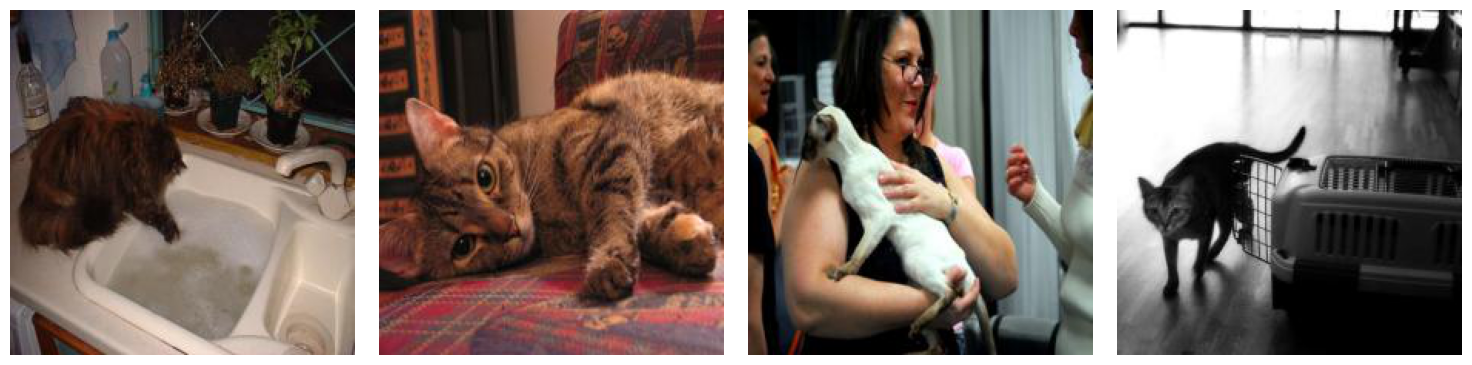

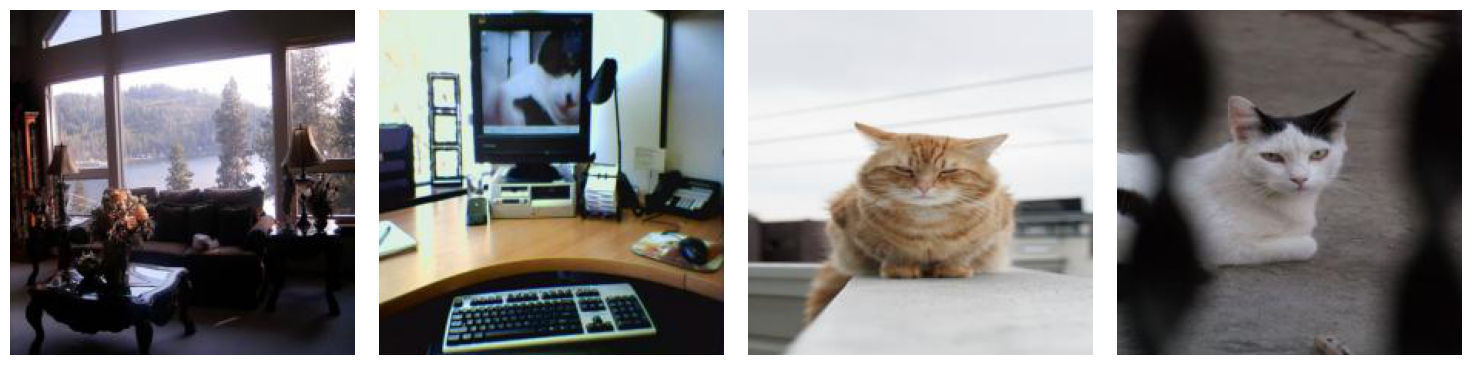

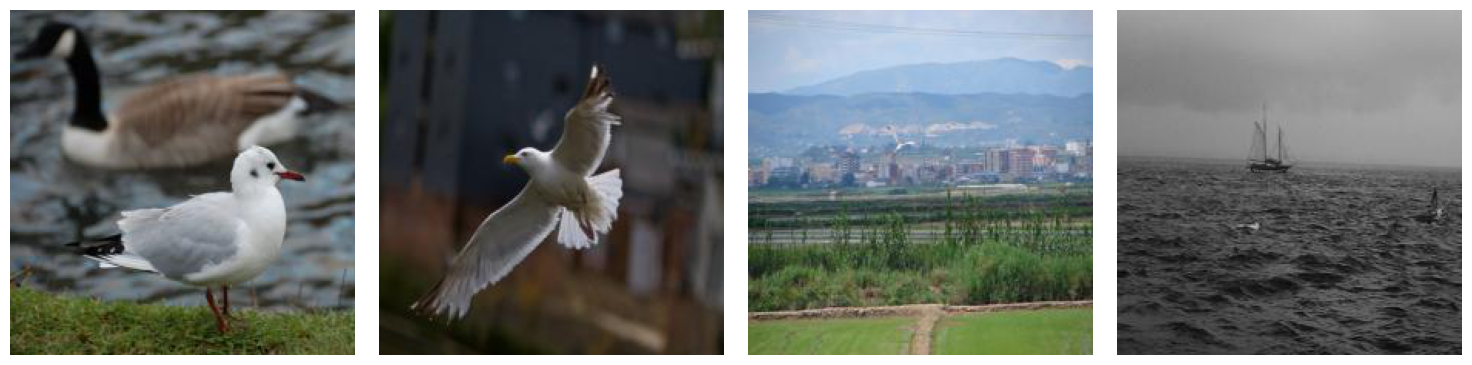

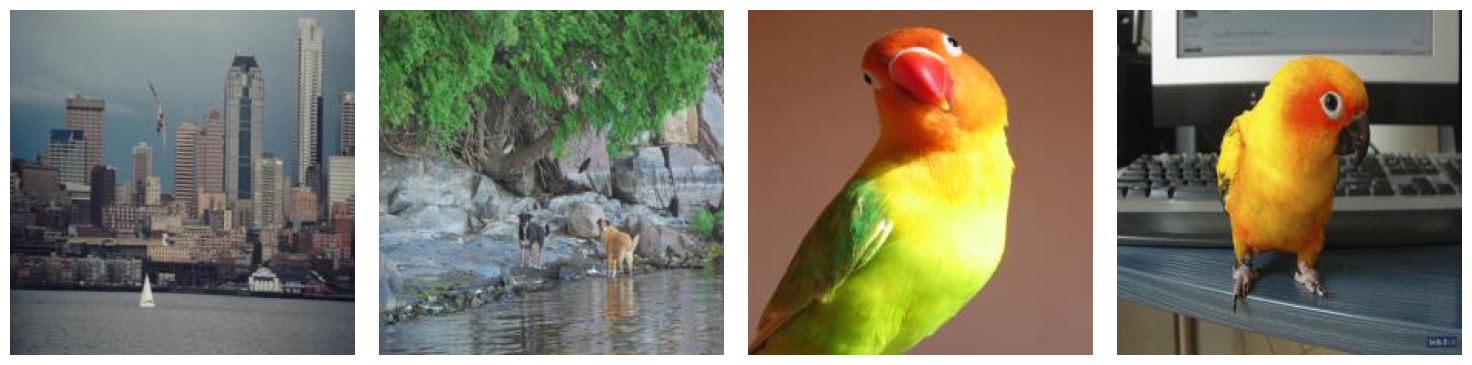

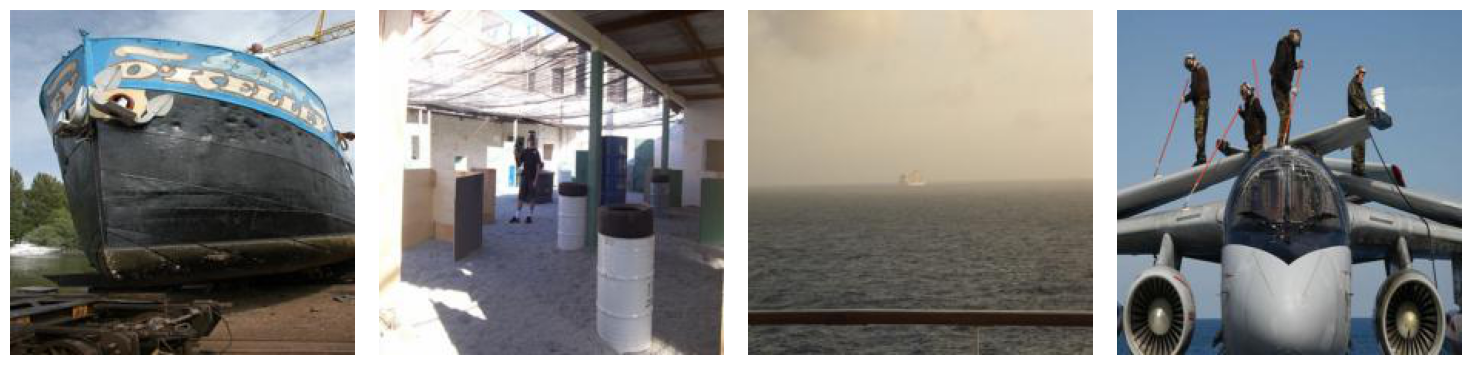

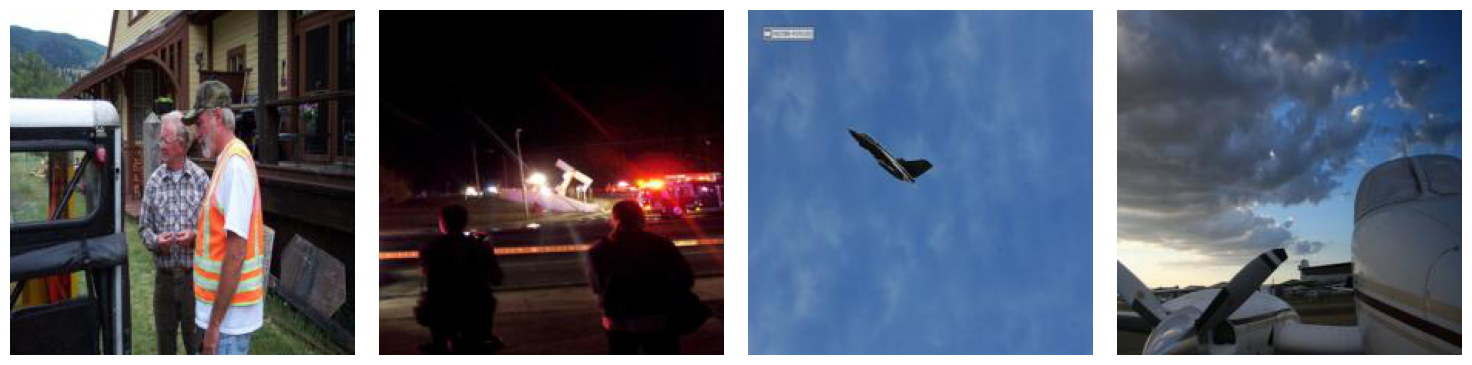

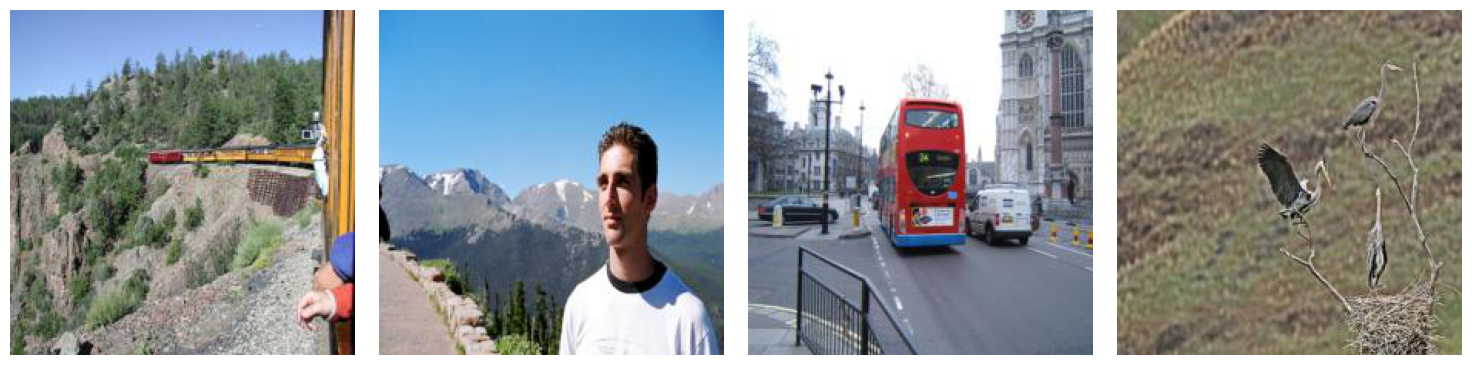

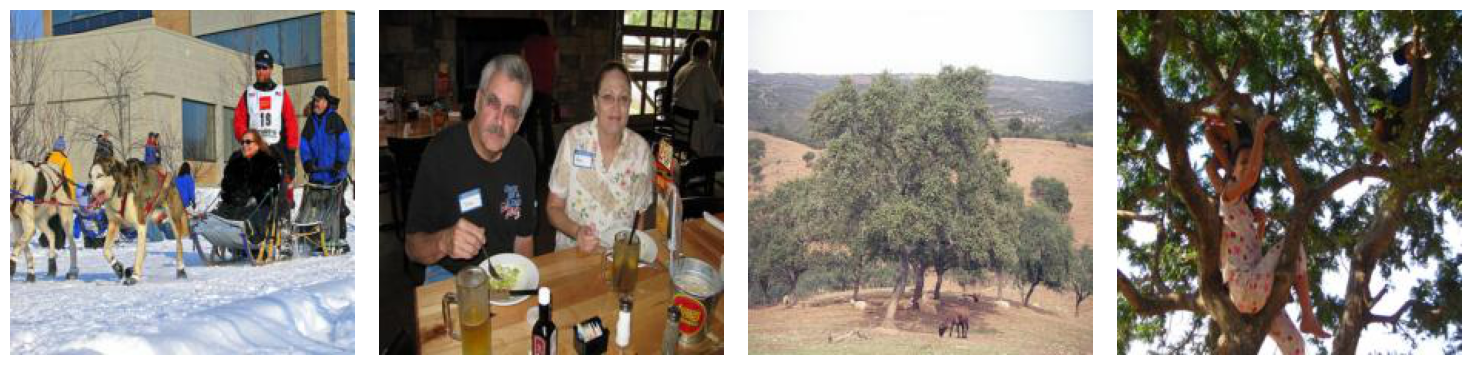

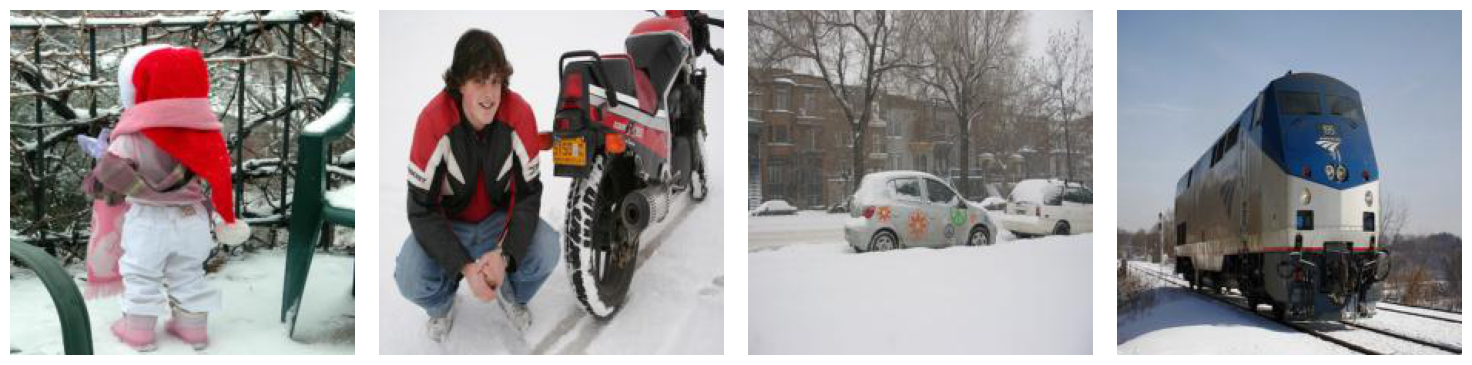

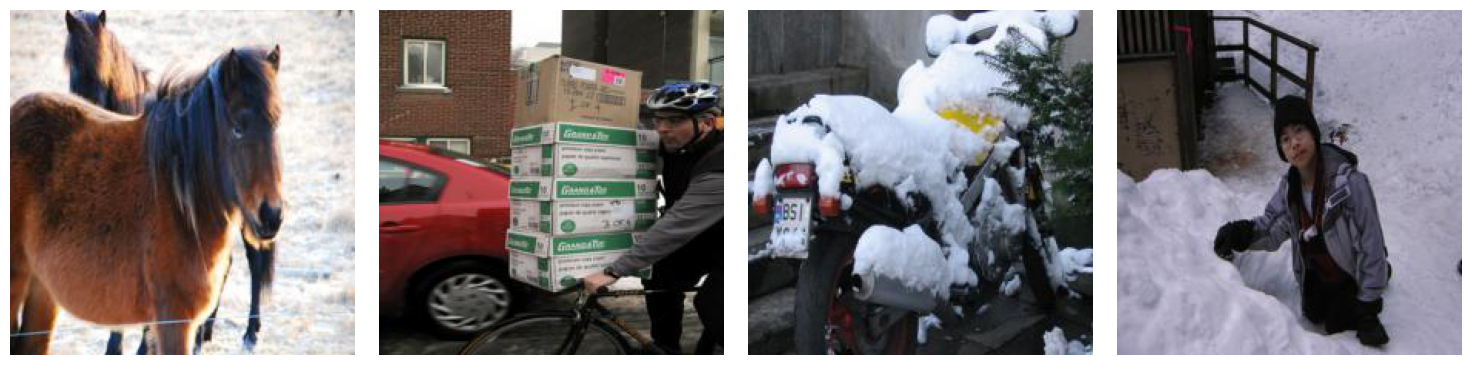

In [351]:
from PIL import Image
for fidx in [103, 125, 13, 16, 217]:
    train_dat = dat.get_train_dataset()

    idxs = []
    for eidx, (x, y, g) in enumerate(train_dat):
        if g[fidx] == 1:
            idxs.append(eidx)

    for uncert_measure, name in zip([std_dev, s_x], ['df', 'uace']):
        fig, axis = plt.subplots(1, 4, figsize=(15, 30))
        plt.axis('off')
        sidxs = np.argsort(uncert_measure[np.array(idxs), fidx])
        for pi, _ in enumerate(sidxs[-2:]):
            axis[pi].imshow(Image.open(train_dat[idxs[_]][0]))
            axis[pi].axis('off')

        for pi, _ in enumerate(sidxs[:2]):
            axis[pi + 2].imshow(Image.open(train_dat[idxs[_]][0]))
            axis[pi + 2].axis('off')
        plt.tight_layout()
        plt.savefig(f"plots/{name}_{dat.concept_names[fidx]}.pdf", bbox_inches='tight')